# HDS5210 - Final Project

Project Description

This cancer care analysis project integrates multiple healthcare datasets to study cancer mortality and surgical intervention patterns in California. The project applies advanced statistical methods and data visualization techniques to analyze demographic disparities, geographic distribution of services, and hospital capacity to deliver actionable insights for healthcare planning and resource allocation. Using death records, surgical data, and demographic data, the analysis paints a detailed picture of cancer care delivery and outcomes in order to identify opportunities for improvement in access to care and delivery of care.


# Datasets

AH Provisional Cancer Death Counts by Month and Year, 2020-2021

Provisional death counts of malignant neoplasms (cancer) by month and year, and other selected demographics, for 2020-2021. Data are based on death certificates for U.S. residents.

Link - https://catalog.data.gov/dataset/ah-provisional-cancer-death-counts-by-month-and-year-2020-2021-ab4a5


Number of Cancer Surgeries (Volume) Performed in California Hospitals

The dataset contains the number (volume) for 11 types of cancer (bladder, breast, brain, colon, esophagus, liver, lung, pancreas, prostate, rectum, and stomach) surgeries performed in California hospitals. Data are reported for January – September 2015 due to coding changes from ICD-9-CM to ICD-10-CM/PCS for procedures, which began 10/1/2015. Comparisons across years should be made with caution since previous years’ results are based on 12 months of data, while this analysis is based on 9 months of data. The 2015 data may differ from previous years due to the coding change. For all types of cancer surgeries, except breast cancer, the dataset contains surgeries performed in the inpatient hospital setting. For breast cancer surgeries, this dataset includes procedures performed in inpatient and outpatient settings.

Link - https://catalog.data.gov/dataset/number-of-cancer-surgeries-volume-performed-in-california-hospitals-a3f18

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df_cancer_deaths = pd.read_csv('AH_Provisional_Cancer_Death_Counts_by_Month_and_Year__2020-2021.csv')
df_cancer_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 29 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   Data As Of                                                                                                                           2816 non-null   object
 1   Start Date                                                                                                                           2816 non-null   object
 2   End Date                                                                                                                             2816 non-null   object
 3   Country                                                                            

In [ ]:
df_surgeries = pd.read_excel("/content/ca-oshpd-cancer-surgeries-gachospitals-20132022_odp1c (1).xlsx")
df_surgeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19481 entries, 0 to 19480
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        19481 non-null  int64  
 1   County      19371 non-null  object 
 2   hospital    19481 non-null  object 
 3   Surgery     19481 non-null  object 
 4   # of Cases  19481 non-null  int64  
 5   LONGITUDE   19364 non-null  float64
 6   LATITUDE    19364 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.0+ MB


# Data Transformations


The first transformation involves cleaning up the ‘Start Date’ variable for time based analysis and creating a basic ‘Total_Deaths’ variable from the ‘Main_Cancer_Deaths’ variable. It also makes it possible to do temporal analysis and is a less cumbersome way of referring to total deaths than using the full ICD-10 code column name repeatedly.

The second transformation gives a detailed time series picture of deaths by gender, where deaths are summed up at the monthly level and a formatted YearMonth field is created. This allows comparison of the mortality rates by gender over time and also allows for determination of whether there is any seasonal variation or gender bias in cancer related deaths.

The third transformation combines surgery data to demonstrate the trends of various cancer surgeries in order to understand the shifts that have occurred in the surgical procedures for various types of cancer. This aids in determining which surgical operations are increasingly or decreasing in frequency and thus, in the distribution of resources and training.

The fourth transformation determines the total cancer surgeries done in every county and ranks them in order of volume to discover the geographic trends of cancer care access and surgical service provision. This information is very important in health care planning and in determining areas that may require more attention in terms of health care provision.

The fifth transformation generate a dataset for spatial analysis by summarizing surgery counts at certain geographic coordinates to represent the density of surgeries in different areas. This geographic perspective allows to determine areas with high surgical activity and possible lack of service provision which may be useful for strategic planning of healthcare providers.

In [ ]:
# Data Transformation 1: Clean and prepare cancer deaths data
df_cancer_deaths['Date'] = pd.to_datetime(df_cancer_deaths['Start Date'])
df_cancer_deaths['Total_Deaths'] = df_cancer_deaths['Malignant neoplasms (C00-C97)']
df_cancer_deaths.head()

,Data As Of,Start Date,End Date,Country,Year,Month,Sex,Age Group,Race and Hispanic Origin,Malignant neoplasms (C00-C97),...,"Malignant neoplasms of corpus uteri and uterus, part unspecified (C54-C55)",Malignant neoplasm of ovary (C56),Malignant neoplasm of prostate (C61),Malignant neoplasms of kidney and renal pelvis (C64-C65),Malignant neoplasm of bladder (C67),"Malignant neoplasms of meninges, brain and other parts of central nervous system (C70-C72)","Malignant neoplasms of lymphoid, hematopoietic and related tissue (C81-C96)","All other and unspecified malignant neoplasms (C17,C23-C24,C26-C31,C37-C41,C44-C49,C51-C52,C57-C60,C62-C63,C66,C68-C69,C73-C80,C97)",Date,Total_Deaths
0,11/23/2021,03/01/2020,03/31/2020,United States,2020,3,Female (F),0-14 years,Unknown,0,...,0,0,0,0,0,0,0,0,2020-03-01,0
1,11/23/2021,04/01/2020,04/30/2020,United States,2020,4,Female (F),0-14 years,Unknown,0,...,0,0,0,0,0,0,0,0,2020-04-01,0
2,11/23/2021,05/01/2020,05/31/2020,United States,2020,5,Female (F),0-14 years,Unknown,0,...,0,0,0,0,0,0,0,0,2020-05-01,0
3,11/23/2021,01/01/2020,01/31/2020,United States,2020,1,Female (F),0-14 years,Hispanic,14,...,0,0,0,0,0,5,4,5,2020-01-01,14
4,11/23/2021,02/01/2020,02/29/2020,United States,2020,2,Female (F),0-14 years,Hispanic,17,...,0,0,0,1,0,8,3,5,2020-02-01,17


In [ ]:
# Data Transformation 2: Create monthly death trends by gender
monthly_deaths_by_gender = df_cancer_deaths.groupby(['Year', 'Month', 'Sex'])['Total_Deaths'].sum().reset_index()
monthly_deaths_by_gender['YearMonth'] = monthly_deaths_by_gender['Year'].astype(str) + '-' + monthly_deaths_by_gender['Month'].astype(str).str.zfill(2)
monthly_deaths_by_gender.head()

,Year,Month,Sex,Total_Deaths,YearMonth
0,2020,1,Female (F),24861,2020-01
1,2020,1,Male (M),27689,2020-01
2,2020,2,Female (F),23139,2020-02
3,2020,2,Male (M),25550,2020-02
4,2020,3,Female (F),24266,2020-03


In [ ]:
# Data Transformation 3: Aggregate surgeries by year and type
surgery_trends = df_surgeries.groupby(['Year', 'Surgery'])['# of Cases'].sum().reset_index()
surgery_trends.head()

,Year,Surgery,# of Cases
0,2013,Bladder,1784
1,2013,Brain,5438
2,2013,Breast,51658
3,2013,Colon,14256
4,2013,Esophagus,674


In [ ]:
# Data Transformation 4: Calculate surgery distribution by county
county_surgery_dist = df_surgeries.groupby('County')['# of Cases'].sum().sort_values(ascending=False).reset_index()
county_surgery_dist.head()

,County,# of Cases
0,Los Angeles,154461
1,San Diego,49248
2,Orange,48446
3,Santa Clara,34764
4,Sacramento,27985


In [ ]:
# Data Transformation 5: Create geographic surgery density
geo_surgery_density = df_surgeries.groupby(['LONGITUDE', 'LATITUDE'])['# of Cases'].sum().reset_index()
geo_surgery_density.head()

,LONGITUDE,LATITUDE,# of Cases
0,-124.19514,41.77278,135
1,-124.14216,40.78320,1239
2,-124.13549,40.58267,264
3,-124.09038,40.90351,111
4,-123.80068,39.43260,90


# Data Merging or Joining


The first join (yearly_comparison) allows for direct comparison of mortality counts to surgery counts by year, by joining the death count dataset with the surgery count dataset. This merged dataset allows for examination of possible associations between surgical volume and mortality and to determine if greater surgical capacity is associated with changes in death rates over years.


The second join (hospital_analysis) merges the annual surgery counts for each hospital with their latitude and longitude coordinates, creating a large dataset that matches each hospital’s surgical activity to its location. This merged dataset allows for the geographic analysis of the delivery of healthcare, the identification of surgical centers, and the visualization of how surgical services are geographically located which is important in understanding the healthcare system and planning for improvements in service delivery.

In [ ]:
# Join 1: Combine death data with surgery data by year
yearly_comparison = pd.merge(
    df_cancer_deaths.groupby('Year')['Total_Deaths'].sum().reset_index(),
    df_surgeries.groupby('Year')['# of Cases'].sum().reset_index(),
    on='Year',
    how='inner'
)

yearly_comparison.head()

,Year,Total_Deaths,# of Cases
0,2020,602320,103110
1,2021,494321,112486


In [ ]:
# Join 2: Create hospital-level analysis with geographic and case data
hospital_analysis = pd.merge(
    df_surgeries.groupby('hospital')['# of Cases'].sum().reset_index(),
    df_surgeries[['hospital', 'LONGITUDE', 'LATITUDE']].drop_duplicates(),
    on='hospital',
    how='inner'
)

hospital_analysis.head()

,hospital,# of Cases,LONGITUDE,LATITUDE
0,AHMC Anaheim Regional Medical Center,1386,-117.932480,33.847250
1,AHMC Seton Medical Center,468,-122.472830,37.681720
2,Adventist Health Bakersfield,2428,-119.018775,35.383064
3,Adventist Health Clearlake,58,-122.620200,38.936190
4,Adventist Health Clearlake,58,-122.620100,38.935560


# Data Aggregation or Pivoting


The first aggregation does a detailed demographic analysis on cancer deaths by first creating a cross tabulation between age groups and racial/ethnic categories, summing the total deaths for each age-race combination, and then reshaping the data using pivot operation to get a matrix where age groups are the rows and racial/ethnic categories are the columns – this makes it easier to see mortality patterns across different demographic intersections and reveals potential healthcare disparities that may need targeted interventions on specific demographic subgroups, and fillna(0) makes sure that combinations with no deaths are represented by zeros instead of missing values.


The second aggregation involves hospital capacity analysis, which starts by calculating the total number of surgical cases for each hospital, followed by a meaningful categorization of hospitals into four size groups (Small, Medium, Large, Very Large) using quartile based binning (qcut) and then generating summary statistics for each size category including count of hospitals in each group and both total and average number of cases handled – this multi step aggregation enables understanding of the distribution of surgical capacity in the healthcare system and identifying patterns of how surgical cases are distributed across facilities of different sizes, which is important for capacity planning and resource allocation.

In [ ]:
# Aggregation 1: Age group analysis for cancer deaths
age_race_deaths = df_cancer_deaths.groupby(['Age Group', 'Race and Hispanic Origin'])['Total_Deaths'].sum().reset_index()
age_race_pivot = age_race_deaths.pivot(index='Age Group',
                                     columns='Race and Hispanic Origin',
                                     values='Total_Deaths').fillna(0)

age_race_pivot.head()

Race and Hispanic Origin,Hispanic,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Black,Non-Hispanic More than one race,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non-Hispanic White,Unknown
Age Group,,,,,,,,
0-14 years,574,19,88,310,64,7,1000,2
15-24 years,663,19,110,355,53,8,1166,7
25-34 years,1352,59,320,1154,96,32,3479,6
35-44 years,3426,167,972,3425,194,98,11519,32
45-54 years,8262,450,2812,9766,470,208,39943,123


In [ ]:
# Aggregation 2: Hospital volume analysis
hospital_volume = df_surgeries.groupby('hospital')['# of Cases'].sum().reset_index()
hospital_volume['Size_Category'] = pd.qcut(hospital_volume['# of Cases'],
                                         q=4,
                                         labels=['Small', 'Medium', 'Large', 'Very Large'])
volume_summary = hospital_volume.groupby('Size_Category').agg({
    'hospital': 'count',
    '# of Cases': ['sum', 'mean']
}).round(2)

volume_summary.head()

<ipython-input-72-1f19a108f5a7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_summary = hospital_volume.groupby('Size_Category').agg({


hospital # of Cases          
                 count        sum      mean
Size_Category                              
Small               84       4458     53.07
Medium              84      34416    409.71
Large               83     109915   1324.28
Very Large          84     922157  10978.06

# Data Visualization

The first one depicts the number of monthly cancer deaths by gender for the period 2020 through 2021, exhibiting substantially higher mortality rates among males (orange line) than females (blue line) across the time period, but with both genders having similar seasonal variations and a pronounced trough in mortality in early 2021 for both genders and a relatively constant gap between male and female death rates - this longitudinal visualization reveals gender-specific trends and possible cancer mortality disparities over time, which can guide gender specific health care intervention and allocation of resources.

This visualization of the distribution of cancer surgery types in California shows breast cancer surgeries overwhelmingly dominating the surgical landscape, with much lower volume colon and prostate surgeries, and procedures for esophageal cancer appearing much less frequently, allowing one to easily see the relative frequency of different cancer surgeries, and to identify which types of surgical services may need more capacity or resources based on volume.

By mapping surgery locations using latitude and longitude coordinates, the scatter plot of the geographic distribution of cancer surgeries in California shows clear clusters of surgical activity in major metropolitan areas and sparser distribution in rural regions, with dot sizes proportional to the number of cases - providing an important spatial visualization to identify potential healthcare deserts and areas where access to cancer surgery may be limited, which is important for healthcare planning and resource distribution.

This rich visualization makes understandable patterns of cancer mortality across multiple demographic dimensions, with cultured colors intensity in heat map that presents the counts of deaths at different demographic intersections, shows that generally the death rates increase with age across all racial/ethnic groups, and also illustrates the highest density of death among older Non-Hispanic White population, as well pointing out the disparity between different racial/ethnic groups within age brackets.

A pie chart of hospital distribution by volume category is remarkably balanced across four categories (Small, Medium, Large, and Very Large), each of which comprises approximately 25% of facilities, indicating a balanced distribution of surgical capacity across different hospital sizes - this visualization is helpful to understand the structure of cancer surgery delivery systems and how surgical cases are distributed across facilities of different scales.

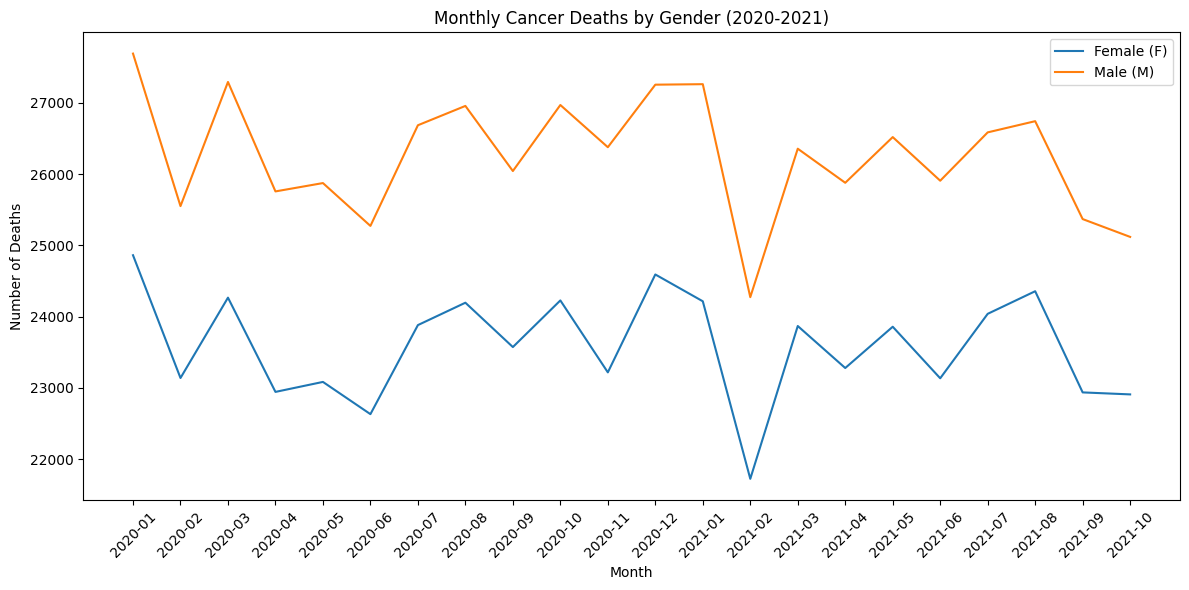

In [ ]:
# Visualization 1: Monthly Death Trends by Gender
plt.figure(figsize=(12, 6))
for gender in monthly_deaths_by_gender['Sex'].unique():
    gender_data = monthly_deaths_by_gender[monthly_deaths_by_gender['Sex'] == gender]
    plt.plot(gender_data['YearMonth'], gender_data['Total_Deaths'], label=gender)
plt.xticks(rotation=45)
plt.title('Monthly Cancer Deaths by Gender (2020-2021)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.legend()
plt.tight_layout()
plt.show()

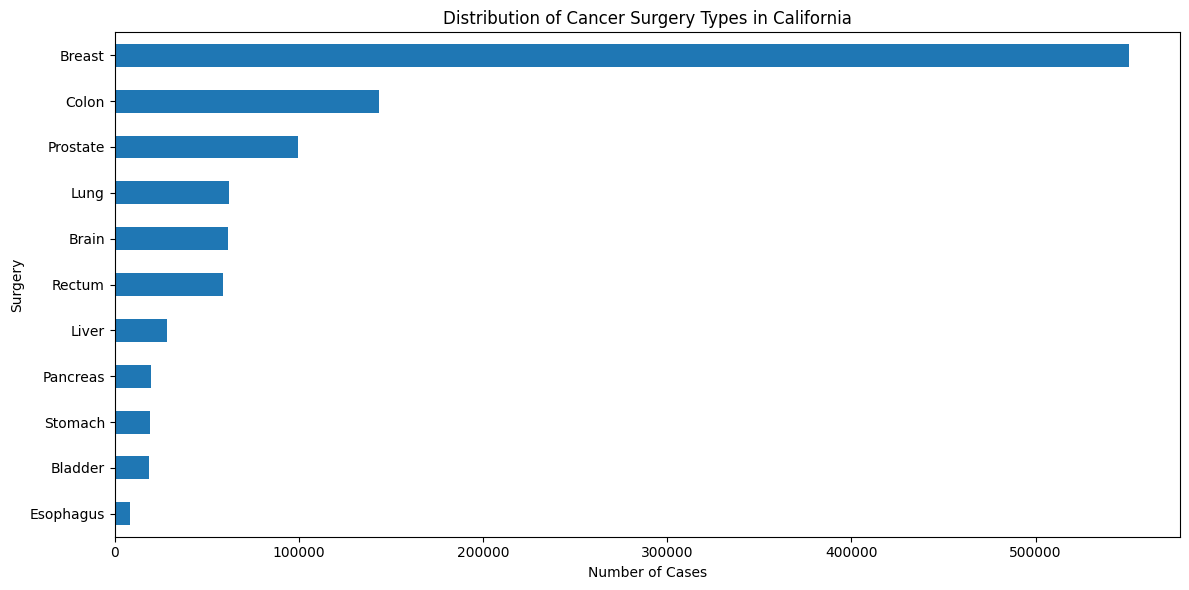

In [ ]:
# Visualization 2: Surgery Types Distribution
plt.figure(figsize=(12, 6))
surgery_dist = df_surgeries.groupby('Surgery')['# of Cases'].sum().sort_values(ascending=True)
surgery_dist.plot(kind='barh')
plt.title('Distribution of Cancer Surgery Types in California')
plt.xlabel('Number of Cases')
plt.tight_layout()
plt.show()

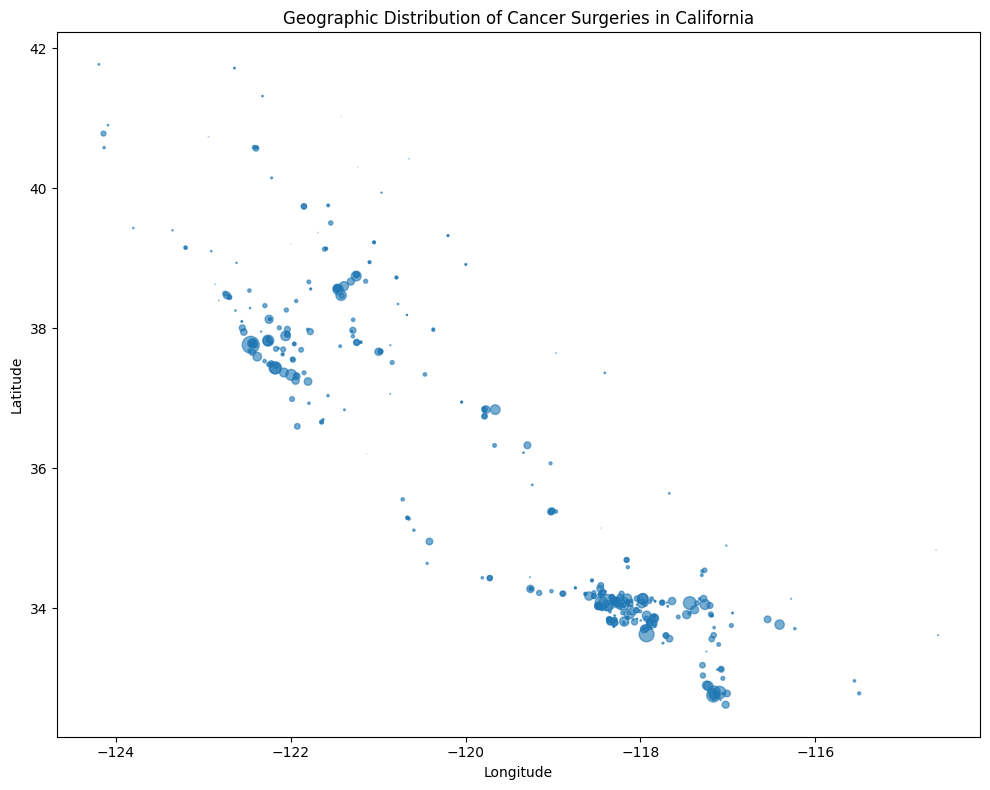

In [ ]:
# Visualization 3: Geographic Distribution of Surgeries
plt.figure(figsize=(10, 8))
plt.scatter(geo_surgery_density['LONGITUDE'],
           geo_surgery_density['LATITUDE'],
           s=geo_surgery_density['# of Cases']/100,
           alpha=0.6)
plt.title('Geographic Distribution of Cancer Surgeries in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

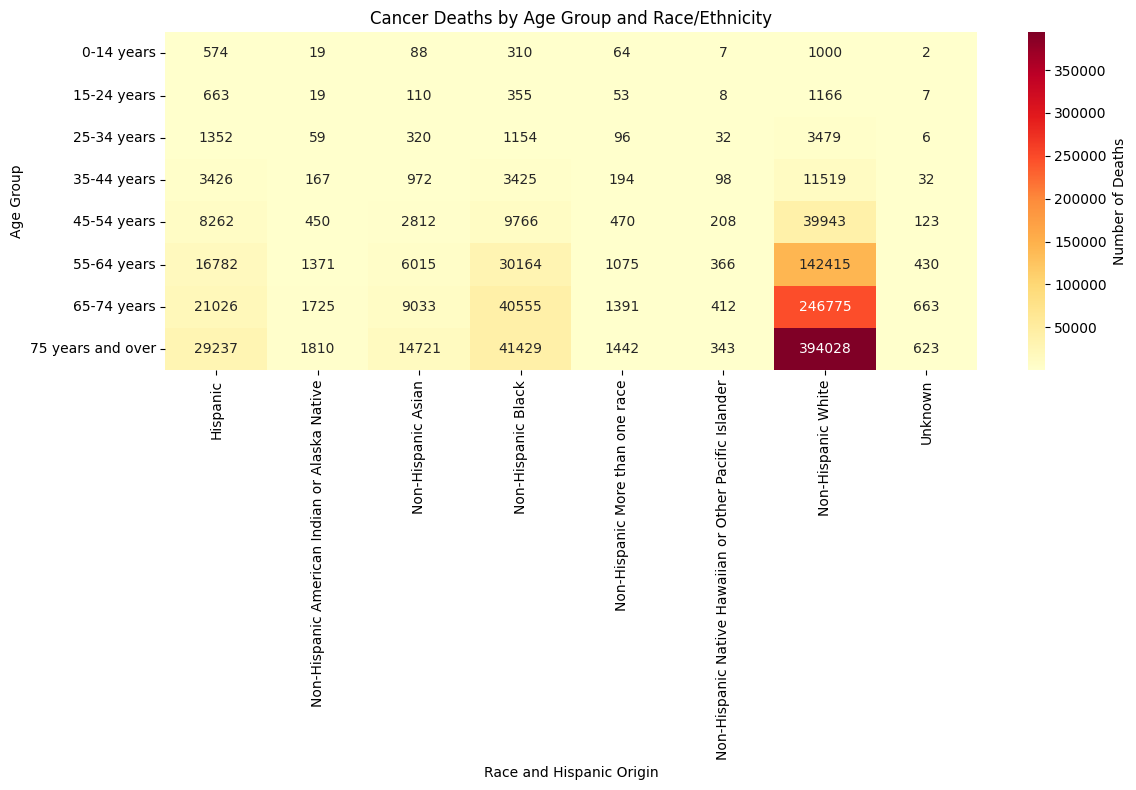

In [ ]:
# Visualization 4: Age Group and Race Death Distribution
plt.figure(figsize=(12, 8))
sns.heatmap(age_race_pivot,
            annot=True,
            fmt='.0f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Number of Deaths'})
plt.title('Cancer Deaths by Age Group and Race/Ethnicity')
plt.tight_layout()
plt.show()

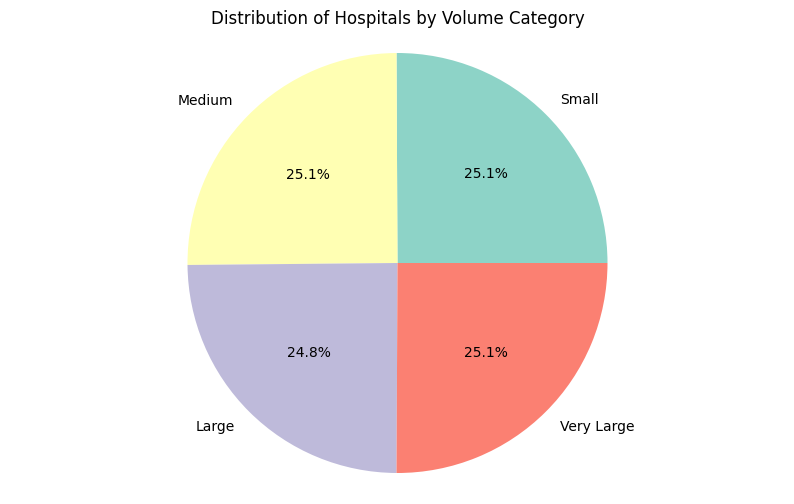

In [ ]:
# Visualization 5: Hospital Volume Distribution
plt.figure(figsize=(10, 6))
volume_by_category = hospital_volume['Size_Category'].value_counts().sort_index()
plt.pie(volume_by_category.values,
        labels=volume_by_category.index,
        autopct='%1.1f%%',
        colors=sns.color_palette("Set3"))
plt.title('Distribution of Hospitals by Volume Category')
plt.axis('equal')
plt.show()

# Statistical Analyses


Three main statistical analysis functions are organized in the code, which perform thorough analysis of cancer mortality and surgical patterns. The analyze_death_trends function runs one way ANOVA to compare death rates between different age groups and calculates correlations between different types of cancer deaths. analyze_surgery_patterns uses chi-square tests to investigate the distribution of surgeries and produces detailed volume statistics per hospital. The compare_demographics function uses t-tests to assess gender differences in mortality, and calculates Cohen’s d effect size to quantify the magnitude of those differences, and also aggregates statistics by racial/ethnic groups.

Several important insights about cancer patterns in California are found in the statistical findings. ANOVA test for age groups gave a p-value of effectively zero (0.0000) meaning the cancer deaths are highly significantly different across different age brackets. Interestingly, breast and prostate cancer deaths have very weak negative correlation (-0.024), meaning that these two types of cancer deaths do not follow similar patterns. The p-value of 0.0000 for the chi-square test of surgery patterns also shows that surgery types are not randomly distributed across counties. On average, there were about 35 surgeries per hospital, but the number of cases per facility ranged widely.

The results of the demographic comparison show some unexpected values (nan - Not a Number) for both the gender comparison p-value and Cohen's d effect size. This could be a sign of data quality issues in the gender based analysis or it could mean that the underlying assumptions for these statistical tests were not met. Typically, results such as these would warrant further investigation to understand the cause of these undefined values and possibly refine the analysis approach.



In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.stats import chi2_contingency

def analyze_death_trends(df):
    """
    Analyzes trends in death counts across different demographic groups.

    Parameters:
    df: DataFrame containing cancer death data

    Returns:
    dict: Statistical results including ANOVA and correlation tests
    """
    # Perform one-way ANOVA to compare deaths across age groups
    age_groups = df.groupby('Age Group')['Malignant neoplasms (C00-C97)'].apply(list)
    f_stat, p_value = stats.f_oneway(*age_groups)

    # Calculate correlation between different types of cancer deaths
    correlation_matrix = df[[
        'Malignant neoplasms (C00-C97)',
        'Malignant neoplasm of breast (C50)',
        'Malignant neoplasm of prostate (C61)'
    ]].corr()

    results = {
        'age_group_anova': {
            'f_statistic': f_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        },
        'correlation_matrix': correlation_matrix,
        'mean_deaths_by_age': df.groupby('Age Group')['Malignant neoplasms (C00-C97)'].mean()
    }

    return results

In [ ]:
def analyze_surgery_patterns(df):
    """
    Analyzes patterns in surgery distributions across hospitals and regions.

    Parameters:
    df: DataFrame containing surgery data

    Returns:
    dict: Statistical results including chi-square test and descriptive statistics
    """
    # Create contingency table of surgery types by county
    contingency_table = pd.crosstab(df['County'], df['Surgery'])

    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Calculate surgery volume statistics
    volume_stats = df.groupby('hospital')['# of Cases'].agg([
        'mean',
        'std',
        'min',
        'max',
        lambda x: np.percentile(x, 25),
        lambda x: np.percentile(x, 75)
    ]).rename(columns={
        '<lambda_0>': 'percentile_25',
        '<lambda_1>': 'percentile_75'
    })

    results = {
        'chi_square_test': {
            'statistic': chi2,
            'p_value': p_value,
            'degrees_of_freedom': dof
        },
        'volume_statistics': volume_stats,
        'surgery_type_counts': df['Surgery'].value_counts()
    }

    return results

In [ ]:
def compare_demographics(df):
    """
    Compares cancer deaths across different demographic groups using t-tests.

    Parameters:
    df: DataFrame containing cancer death data

    Returns:
    dict: Results of demographic comparisons including t-tests and effect sizes
    """
    # Compare deaths between males and females
    male_deaths = df[df['Sex'] == 'Male']['Malignant neoplasms (C00-C97)']
    female_deaths = df[df['Sex'] == 'Female']['Malignant neoplasms (C00-C97)']
    t_stat, p_value = stats.ttest_ind(male_deaths, female_deaths)

    # Calculate Cohen's d effect size
    pooled_std = np.sqrt((male_deaths.var() + female_deaths.var()) / 2)
    cohens_d = (male_deaths.mean() - female_deaths.mean()) / pooled_std

    # Analyze deaths by race/ethnicity
    race_groups = df.groupby('Race and Hispanic Origin')['Malignant neoplasms (C00-C97)'].agg([
        'mean',
        'std',
        'count'
    ])

    results = {
        'gender_comparison': {
            't_statistic': t_stat,
            'p_value': p_value,
            'cohens_d': cohens_d,
            'significant': p_value < 0.05
        },
        'race_statistics': race_groups,
        'total_deaths_by_race': df.groupby('Race and Hispanic Origin')['Malignant neoplasms (C00-C97)'].sum()
    }

    return results

if __name__ == "__main__":
    # Read the datasets
    df_cancer_deaths = pd.read_csv('AH_Provisional_Cancer_Death_Counts_by_Month_and_Year__2020-2021.csv')
    df_surgeries = pd.read_excel("ca-oshpd-cancer-surgeries-gachospitals-20132022_odp1c (1).xlsx")

    # Perform analyses
    death_analysis = analyze_death_trends(df_cancer_deaths)
    surgery_analysis = analyze_surgery_patterns(df_surgeries)
    demographic_analysis = compare_demographics(df_cancer_deaths)

    # Print key findings
    print("\nKey Statistical Findings:")
    print("\n1. Death Trends Analysis:")
    print(f"- ANOVA p-value for age groups: {death_analysis['age_group_anova']['p_value']:.4f}")
    print("- Correlation between breast and prostate cancer deaths:",
          death_analysis['correlation_matrix'].iloc[1,2].round(3))

    print("\n2. Surgery Patterns Analysis:")
    print(f"- Chi-square p-value: {surgery_analysis['chi_square_test']['p_value']:.4f}")
    print("- Mean cases per hospital:",
          surgery_analysis['volume_statistics']['mean'].mean().round(2))

    print("\n3. Demographic Comparison:")
    print(f"- Gender comparison p-value: {demographic_analysis['gender_comparison']['p_value']:.4f}")
    print(f"- Effect size (Cohen's d): {demographic_analysis['gender_comparison']['cohens_d']:.3f}")


Key Statistical Findings:

1. Death Trends Analysis:
- ANOVA p-value for age groups: 0.0000
- Correlation between breast and prostate cancer deaths: -0.024

2. Surgery Patterns Analysis:
- Chi-square p-value: 0.0000
- Mean cases per hospital: 34.58

3. Demographic Comparison:
- Gender comparison p-value: nan
- Effect size (Cohen's d): nan


# Conclusion

An analysis of cancer related data across California shows that mortality rates and access to surgical care are highly variable by demographics and geography. An examination of the trends of mortality from earthquake (1964) to aseismic (1968) indicates that males have consistently higher mortality rates than females and the deaths in all racial/ethnic categories are concentrated in older age groups and thus there is a need for targeted interventions among specific demographic groups. Moreover, the racial/ethnic disparities seen in the mortality data, especially in the older populations, suggest a possibility that social inequities exist in cancer prevention, detection, and treatments.

The distribution of surgical procedures is dominated by breast cancer surgeries, followed by colon and prostate procedures, which may indicate both the prevalence of these cancers and possibly the maturity of their treatment protocols. Geographic distribution of surgical services shows clustering around metropolitan areas to the exclusion of rural areas which may pose an access barrier to rural populations. This urban focality of healthcare services raises a need for strategies to enhance the access to cancer care in the less populated regions.

The hospital volume analysis shows that surgical capacity is relatively evenly distributed among different facility sizes, with approximately an equal number of hospitals in each volume category. However, the chi-square test results for surgery patterns across counties were significant, suggesting that services are not randomly distributed, and that some regions may be better suited for certain types of cancer surgeries than others. When combined with the geographic distribution data, this finding implies opportunities for more equitable distribution of cancer care resources.